In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_22/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


[<img src="https://www.digitalhouse.com/ar/logo-DH.png" width="400" height="200" align='right'>](http://digitalhouse.com.ar/)

### Dataset cereales

En el siguiente dataset se encuentra información sobre diferentes cereales.

Las categorías en las columnas son:
       
   * **name** : Nombre del producto
   
   
   * **mfr** : Nombre del fabricante:
      * A = American Home Food Products
      * G = General Mills
      * K = Kelloggs
      * N = Nabisco
      * P = Post
      * Q = Quaker Oats
      * R = Ralston Purina 
   
   
   *  **type**:
      * C = frío  
      * H = caliente 
        
   
   *  **calories**: calorias por porción
   *  **protein**:  gramos de proteinas
   *  **fat**:      gramos de grasa
   *  **sodium**:   miligramos de sodio
   *  **fiber**:    gramos de fibra dietética
   *  **arbo**:     gramos de azúcares complejos
   *  **sugars**:   gramos de azúcares simples
   *  **potass**:   miligramos de K
   *  **vitamins**: vitaminas y minerales - 0, 25, o 100, indicando el % recomendado por la FDA.
   *  **shelf**:    display shelf (1, 2, or 3, counting from the floor)
   *  **weight**:   peso en onzas de una porción
   *  **cups**:     numero de copas en una porción 
   *  **rating**:   clasificación de los cereales (Possibly from Consumer Reports?)
        
A partir de ésta información:
     
  * Caracterizar el tipo de dato de cada columna (_string, int, float_) y,
  * Reconocer el tipo variable (_continua, categórica_).

### Leer el Archivo 'cereal.csv'.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#### Imprimir 5 muestras para reconocimiento de datos,  ¿Coinciden con las caracterizaciones realizadas?

In [3]:
df = pd.read_csv('../Data/cereal.csv')
df.sample(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
12,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,45,25,2,1.00,0.75,19.823573
66,Smacks,K,C,110,2,1,70,1.0,9.0,15,40,25,2,1.00,0.75,31.230054
56,Quaker Oat Squares,Q,C,100,4,1,135,2.0,14.0,6,110,25,3,1.00,0.50,49.511874
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
51,Oatmeal Raisin Crisp,G,C,130,3,2,170,1.5,13.5,10,120,25,3,1.25,0.50,30.450843


#### Tomar una columna categórica a elección y convertir en una variable dummie.

Se puede utilizar la función ```pd.get_dummies()```.


In [4]:
dummies = pd.get_dummies(df.loc[:,'mfr'])
dummies.head()

,A,G,K,N,P,Q,R
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1


##### Tomar la columna de fabricante, transformar a variable dummie y contar cuantos productos son de Kelloggs.

In [5]:
dummies['K'].sum()

23

##### Ordenar los fabricantes por cantidad de productos en orden descendente y presentarlo en un gráfico.

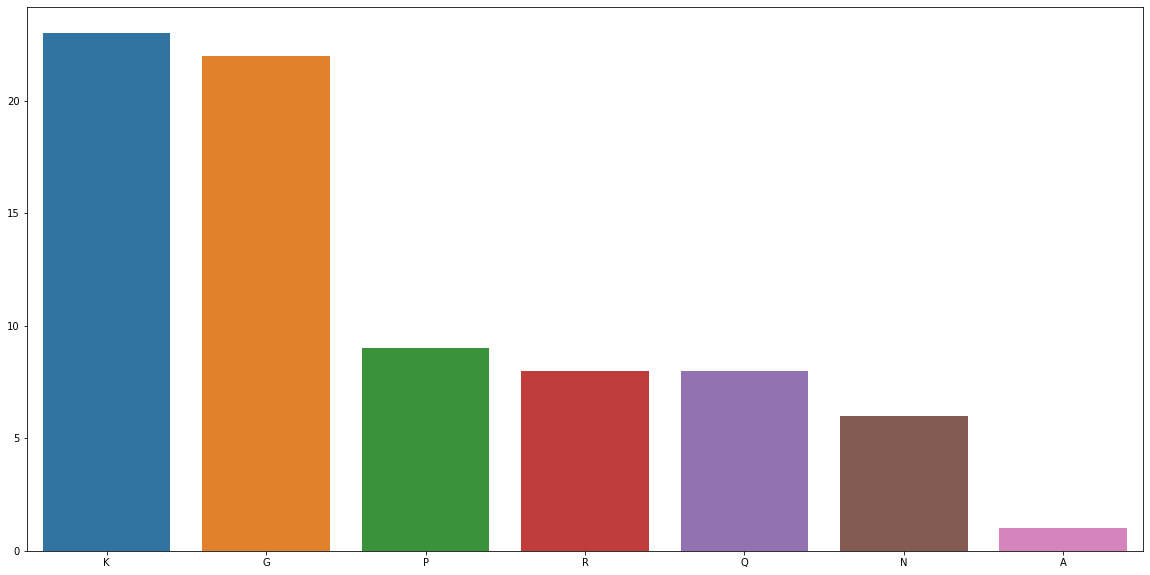

In [6]:
import matplotlib.pyplot as plt

manf_sort = pd.get_dummies(df['mfr']).sum().sort_values(ascending = False)
plt.figure(figsize=(20,10))
sns.barplot(x = manf_sort.index, y = manf_sort.values)

plt.show()

##### La función ```pd.get_dummies()``` permite tomar mas de una columna, por ejemplo, utilizando slicing. 
##### Tomar las columnas 'mfr' y 'type',  y convertirlas en variables dummies simultáneamente, obtener una descripción de ese dataframe.

In [7]:
pd.get_dummies(df.loc[:,'mfr':'type']).describe()

,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.012987,0.285714,0.298701,0.077922,0.116883,0.103896,0.103896,0.961039,0.038961
std,0.113961,0.454716,0.460690,0.269807,0.323388,0.307127,0.307127,0.194771,0.194771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
